# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient


%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\itsme\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv('keys.env')
api_key = os.getenv("NEWS_API_KEY")
type(api_key)

str

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient

In [4]:
#set newsapi Client   - check with tutor and Api set up
from newsapi import NewsApiClient
#newsapi = NewsApiClient(api_key=api_key)

In [5]:
#Fetch the Bitcon new articles

newsapi = NewsApiClient(api_key=api_key)
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_news = newsapi.get_everything(
    q="bitcoin",
)
btc_news["totalResults"]

14387

In [6]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

#eth_news = newsapi.get_everything(q="Ethereum",language="en")


newsapi = NewsApiClient(api_key=api_key)

eth_news = newsapi.get_everything(
    q="ethereum",
)
eth_news["totalResults"]

6611

In [7]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text,
            "date": date,
         })
        
    except AttributeError:
        pass
    
       
#DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

#Colums
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,date,text,compound,positive,negative,neutral
0,2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902
1,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
2,2022-06-08,A new study on bitcoin calls into question whe...,0.5267,0.124,0.000,0.876
3,2022-06-05,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836
4,2022-06-02,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960


In [8]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

eth_news["totalResults"]
for article in eth_news["articles"]:
    try:
        title = article["title"]
        text = article["content"]
        description = article["description"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "Title": title,
            "Text": text,
            "Description": description,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Neutral": neu,
            "Negative": neg,
            
            
         })
        
    except AttributeError:
        pass
    
#DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

#Columns
cols = ["Title", "Date", "Description", "Text", "Compound", "Positive", "Neutral", "Negative"]
ethereum_df = ethereum_df[cols]
#head
ethereum_df.head()

,Title,Date,Description,Text,Compound,Positive,Neutral,Negative
0,Here's what NFTs look like on Instagram,2022-05-10,Meta has revealed more of how NFTs will work o...,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.646,0.000
1,GameStop Dunks Its Head Into the Crypto Kiddie...,2022-05-23,GameStop has officially thrown itself headlong...,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.646,0.040
2,PayPal Lets Users Transfer Bitcoin and Ethereu...,2022-06-07,PayPal announced on Tuesday that the service n...,The ability to conduct external transfers on P...,0.3182,0.059,0.646,0.000
3,GameStop Launching Digital Wallet for Cryptocu...,2022-05-23,The self-custodial Ethereum wallet will have i...,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.646,0.000
4,New York passes a bill to limit bitcoin mining,2022-06-03,New York lawmakers have passed a bill\r\n that...,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.646,0.098


In [9]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.087630,0.048200,0.065450,0.886450
std,0.403464,0.049645,0.069041,0.073103
min,-0.859300,0.000000,0.000000,0.646000
25%,-0.386825,0.000000,0.000000,0.858000
50%,-0.051350,0.041500,0.063000,0.888500
75%,0.249275,0.077500,0.087500,0.924250
max,0.526700,0.164000,0.300000,1.000000


In [10]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,2.000000e+01,20.000000
mean,-0.008160,0.041350,6.460000e-01,0.040550
std,0.398847,0.051657,2.278130e-16,0.049995
min,-0.690800,0.000000,6.460000e-01,0.000000
25%,-0.381800,0.000000,6.460000e-01,0.000000
50%,0.000000,0.017000,6.460000e-01,0.020000
75%,0.323650,0.072750,6.460000e-01,0.077000
max,0.690800,0.178000,6.460000e-01,0.178000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: equal

Q. Which coin had the highest positive score?

A: equal

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
sw = stopwords.words('english')
print(sw)
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

sw_addons = ['announced', 'also', 'basically', 'char', 'fi', 'found','ha', 'said', 'sent', 'today', 'week']
sw.append(sw_addons)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
# Complete the tokenizer function
def tokenizer(words):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    # Create a tokenized list of the words
    words = word_tokenize(words)
    words = list(filter(lambda w: w not in punctuation, words))

    # Convert the words to lowercase

    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the stop words

    words = list(filter(lambda w: w.lower() not in sw, words))

    # Lemmatize words into root words
    
    tokens = [lemmatizer.lemmatize(word) for word in words]
    return tokens

   
    
     

In [14]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902,"[New, York, lawmaker, passed, bill, would, tem..."
1,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,"[even, though, number, women-focused, crypto, ..."
2,2022-06-08,A new study on bitcoin calls into question whe...,0.5267,0.124,0.000,0.876,"[new, study, bitcoin, call, question, whether,..."
3,2022-06-05,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836,"[Image, caption, President, Faustin-Archange, ..."
4,2022-06-02,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960,"[reportedly, pay, burrito, taco, Bitcoin, digi..."


In [17]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
#ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
#ethereum_df.head()

ethereum_df['Tokens'] = ethereum_df['Text'].apply(tokenizer)
ethereum_df.head()

,Title,Date,Description,Text,Compound,Positive,Neutral,Negative,Tokens
0,Here's what NFTs look like on Instagram,2022-05-10,Meta has revealed more of how NFTs will work o...,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.646,0.000,"[Meta, revealed, NFTs, work, Instagram, US-bas..."
1,GameStop Dunks Its Head Into the Crypto Kiddie...,2022-05-23,GameStop has officially thrown itself headlong...,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.646,0.040,"[GameStop, officially, thrown, headlong, web3,..."
2,PayPal Lets Users Transfer Bitcoin and Ethereu...,2022-06-07,PayPal announced on Tuesday that the service n...,The ability to conduct external transfers on P...,0.3182,0.059,0.646,0.000,"[ability, conduct, external, transfer, PayPal,..."
3,GameStop Launching Digital Wallet for Cryptocu...,2022-05-23,The self-custodial Ethereum wallet will have i...,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.646,0.000,"[GameStop, going, all-in, crypto, video, game,..."
4,New York passes a bill to limit bitcoin mining,2022-06-03,New York lawmakers have passed a bill\r\n that...,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.646,0.098,"[New, York, lawmaker, passed, bill, would, tem..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [ ]:
from collections import Counter
from nltk import ngrams

In [ ]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!

bitcoin_tokenized = tokenizer(bitcoin_df.text.str.cat())
N=2
bitcoin_bigram_counts = Counter(ngrams(bitcoin_tokenized, N))
print(dict(bitcoin_bigram_counts))

{('new', 'york'): 1, ('york', 'lawmaker'): 1, ('lawmaker', 'passed'): 1, ('passed', 'bill'): 1, ('bill', 'would'): 1, ('would', 'temporarily'): 1, ('temporarily', 'ban'): 1, ('ban', 'new'): 1, ('new', 'bitcoin'): 1, ('bitcoin', 'mining'): 1, ('mining', 'operation'): 1, ('operation', 'early'): 1, ('early', 'friday'): 1, ('friday', 'state'): 1, ('state', 'senator'): 1, ('senator', 'voted'): 1, ('voted', 'pas'): 1, ('pas', 'legislation'): 1, ('legislation', 'bound'): 1, ('bound', 'desk'): 1, ('desk', 'charsnow'): 1, ('charsnow', 'even'): 1, ('even', 'though'): 1, ('though', 'number'): 1, ('number', 'womenfocused'): 1, ('womenfocused', 'crypto'): 1, ('crypto', 'space'): 1, ('space', 'odeniran'): 1, ('odeniran', 'say'): 1, ('say', 'woman'): 1, ('woman', 'still'): 1, ('still', 'underrepresented'): 1, ('underrepresented', 'ive'): 1, ('ive', 'space'): 1, ('space', 'im'): 1, ('im', 'black'): 1, ('black', 'person'): 1, ('person', 'woman'): 1, ('woman', 'b'): 1, ('b', 'charsyou'): 1, ('charsyou',

In [ ]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ether_tokenized = tokenizer(ethereum_df.text.str.cat())
N=2
ether_bigram_counts = Counter(ngrams(ether_tokenized, N))
print(dict(ether_bigram_counts))

{('meta', 'ha'): 1, ('ha', 'revealed'): 1, ('revealed', 'nfts'): 1, ('nfts', 'work'): 1, ('work', 'instagram'): 1, ('instagram', 'usbased'): 1, ('usbased', 'test'): 1, ('test', 'show'): 1, ('show', 'youve'): 1, ('youve', 'bought'): 1, ('bought', 'created'): 1, ('created', 'free'): 1, ('free', 'connecting'): 1, ('connecting', 'instagram'): 1, ('instagram', 'account'): 1, ('account', 'compatible'): 1, ('compatible', 'digital'): 1, ('digital', 'walle'): 1, ('walle', 'charsgamestop'): 1, ('charsgamestop', 'ha'): 1, ('ha', 'officially'): 1, ('officially', 'thrown'): 1, ('thrown', 'headlong'): 1, ('headlong', 'web'): 1, ('web', 'viper'): 1, ('viper', 'nest'): 1, ('nest', 'new'): 1, ('new', 'app'): 1, ('app', 'release'): 1, ('release', 'though'): 1, ('though', 'hard'): 1, ('hard', 'say'): 1, ('say', 'whether'): 1, ('whether', 'proposed'): 1, ('proposed', 'population'): 1, ('population', 'gamers'): 1, ('gamers', 'game'): 1, ('game', 'developer'): 1, ('developer', 'take'): 1, ('take', 'charsgam

In [ ]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [ ]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
bitcoin_top10= token_count(bitcoin_tokenized, 10)
bitcoin_top10

[('bitcoin', 9),
 ('new', 8),
 ('cryptocurrency', 7),
 ('week', 6),
 ('world', 5),
 ('blockchain', 5),
 ('stolen', 4),
 ('reuters', 4),
 ('luna', 4),
 ('token', 4)]

In [ ]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
ether_top10= token_count(ether_tokenized, 10)
ether_top10

[('cryptocurrency', 10),
 ('ha', 6),
 ('bitcoin', 6),
 ('digital', 4),
 ('ethereum', 4),
 ('may', 4),
 ('market', 4),
 ('char', 4),
 ('world', 4),
 ('web', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [ ]:
#wc = WordCloud().generate(input_text)
#plt.imshow(wc)

#wc = WordCloud(width=1200, height=800, max_words=50).generate(input_text)
#plt.imshow(wc)

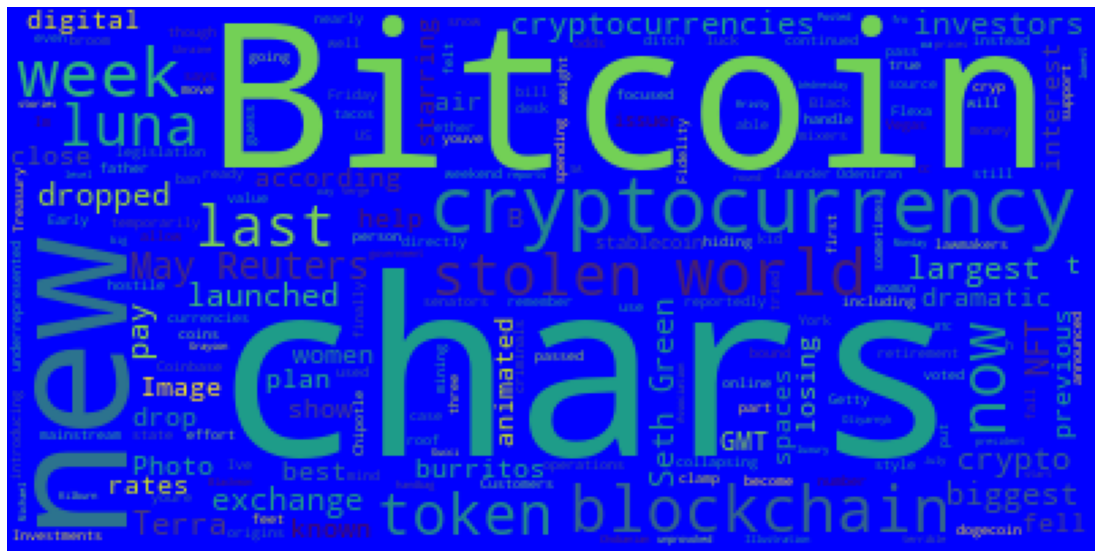

In [ ]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
cloud_bit = WordCloud(background_color='blue').generate(bitcoin_df.text.str.cat())
cloud_bit
plt.axis("off")
plt.imshow(cloud_bit);

In [ ]:
#Go Gators :)

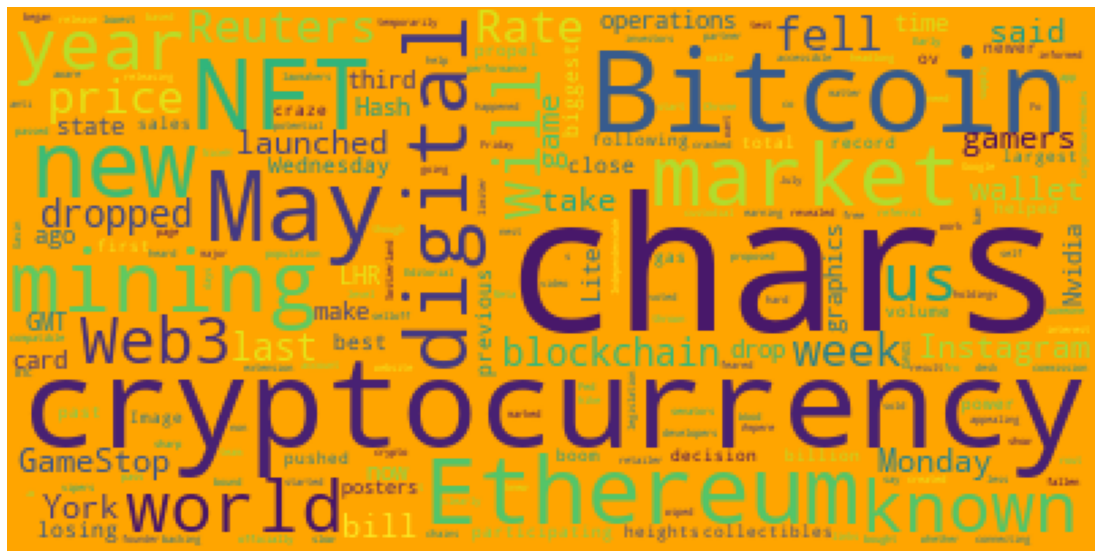

In [ ]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
cloud_eth = WordCloud(background_color='orange').generate(ethereum_df.text.str.cat())
cloud_eth
plt.axis("off")
plt.imshow(cloud_eth);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [19]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy   *********
# !python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [20]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [21]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_content = ' '.join(bitcoin_df['text'])
btc_content

"New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of… [+2036 chars] Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars] A new study on bitcoin calls into question whether the digital currency is truly as decentralized and anonymous as its biggest devotees would have you believe. \r\n Researchers from Baylor, Rice, and t… [+7343 chars] Image caption, President Faustin-Archange Touadéra wants to rethink his country's economic philosophy\r\nThe Central African Republic's decision to adopt Bitcoin as legal tender came as a surprise to m… [+8881 chars] You can now reportedly pay for your burritos and tacos with Bitcoin and other digital currencies, in case you don't mind spending y

In [23]:
import spacy
from spacy import displacy

In [ ]:
#nlp = spacy.load('en_core_web_sm')   **** check with tutor if correct due 
nlp = spacy.load('en_core_web_sm')

# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(btc_content)

# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "BITCOIN NER"




#

In [ ]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [ ]:
# List all Entities   ***** Need to Finish Tueday****
# YOUR CODE HERE!
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

New York GPE
Friday DATE
36-27 CARDINAL
Odeniran GPE
first ORDINAL
Getty Images
 ORG
the weekend DATE
34,000 MONEY
27,630 MONEY
Coinbase PERSON
+2164 NORP
nearly three feet QUANTITY
Last week DATE
Fidelity Investments ORG
the US Treasury ORG
Grayson Blackmon PERSON
Oliyarnyk / CC-BY-SA-4.0 ORG
Michael Chobanian PERSON
the Blockchain Association of Ukraine ORG
Bitcoin ORG
Gucci handbag PERSON
week DATE
Kristy Kilburn PERSON
May 11 DATE
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
GMT WORK_OF_ART
Wednesday DATE
2,241.68 MONEY
40.4% PERCENT
May 9 DATE
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
GMT WORK_OF_ART
Monday DATE
2,655.98 MONEY
35% PERCENT
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
Mexican NORP
North London LOC
a few weeks ago DATE
+2779 PERSON
May 24 DATE
Reuters ORG
its ninth week DATE
May 10 DATE
Reuters ORG
Seth Green's PERSON
NFT ORG
two CARDINAL
Seth Green's PERSON
Nike ORG
today DATE
Seth Green's PERSON
NFT ORG
] Sam Bankman-Fried PERSON
the digital asset 

---

### Ethereum NER

In [27]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
ethereum_text = ' '.join(ethereum_df.Text)






In [28]:
import spacy
from spacy import displacy

In [33]:
nlp = spacy.load('en_core_web_sm')
# Run the NER processor on all of the text
# YOUR CODE HERE!
#doc = nlp(eth_content)
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
# YOUR CODE HERE!
#displacy.render(doc, style='ent')
ethereum_doc.user_data["title"] = "Ethereum NER"

In [35]:
# Render the visualization
# YOUR CODE HERE!
#displacy.render(doc, style='ent')
displacy.render(ethereum_doc, style='ent')

In [38]:
# List all Entities
# YOUR CODE HERE!
for ent in ethereum_doc.ents:
    print(ent.text + ' ' + ent.label_)


    #
    #print('{} {}'.format(ent.text, ent.label_))

Meta ORG
Instagram ORG
US GPE
Instagram ORG
web3 LOC
PayPal ORG
today DATE
U.S. GPE
Ethereum ORG
Monday DATE
Google Chrome PRODUCT
New York GPE
Friday DATE
36-27 CARDINAL
Switzerland GPE
May 25 DATE
Reuters ORG
Gavin Wood PERSON
47,454 MONEY
34,007 MONEY
28%.About a third CARDINAL
this week DATE
Nvidia PERSON
Ampere Lite Hash Rate WORK_OF_ART
LHR ORG
Ethereum ORG
May 11 DATE
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
GMT WORK_OF_ART
Wednesday DATE
2,241.68 MONEY
40.4% PERCENT
May 9 DATE
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
GMT WORK_OF_ART
Monday DATE
2,655.98 MONEY
35% PERCENT
Reuters ORG
5.2% PERCENT
31,441.76 MONEY
GMT WORK_OF_ART
Monday DATE
1,552.78 MONEY
34.8% PERCENT
year DATE
9 CARDINAL
8 CARDINAL
Nvidia ORG
LHR ORG
last year  DATE
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
the past few years DATE
NFT ORG
$29 billion MONEY
several years ago DATE
Kim Kardashian PERSON
Floyd Mayweather PERSON
NBA ORG
Paul Pierce PERSON
Ether PERSON
Getty Images
 ORG
the w

---